### ANÁLISE E PREVISÃO DA ARRECADAÇÃO FEDERAL

Autor: GABRIEL RODRIGUES  MARCOLINI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Define parâmetros iniciais
dataset_path = '.\\dataset\\CSV\\'
filename_input = 'arrecadacao-TOTAL-GERAL-2015-2020.csv'
indicadores = 'xgdvConsulta.csv'

In [3]:
#Faz a leitura dos datasets
#tb = tabela de Arrecadação Federal
#ie = tabela de indicadores econômicos
tb = pd.read_csv(dataset_path+filename_input) 
ie = pd.read_csv(dataset_path+indicadores,sep=';',decimal=',')

In [4]:
#Ajusta o campo DATA do dataframe ie
ie['DATA'] =  pd.to_datetime(ie['DATA'],format="%m/%Y") + pd.tseries.offsets.MonthEnd(0)
ie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATA    66 non-null     datetime64[ns]
 1   IGP-M   66 non-null     float64       
 2   IPCA    66 non-null     float64       
 3   INPC    66 non-null     float64       
 4   SELIC   66 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.7 KB


In [5]:
#Ajusta o campo DATA do dataframe tb
tb['DATA'] = pd.to_datetime(tb['DATA'],format="%Y/%m/%d")
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   RECEITAS  1782 non-null   object        
 1   UF        1782 non-null   object        
 2   VALOR     1782 non-null   float64       
 3   DATA      1782 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 55.8+ KB


In [6]:
ie

,DATA,IGP-M,IPCA,INPC,SELIC
0,2015-01-31,0.76,1.24,1.48,0.94
1,2015-02-28,0.27,1.22,1.16,0.82
2,2015-03-31,0.98,1.32,1.51,1.04
3,2015-04-30,1.17,0.71,0.71,0.95
4,2015-05-31,0.41,0.74,0.99,0.99
...,...,...,...,...,...
61,2020-02-29,-0.04,0.25,0.17,0.29
62,2020-03-31,1.24,0.07,0.18,0.34
63,2020-04-30,0.80,-0.31,-0.23,0.28
64,2020-05-31,0.28,-0.38,-0.25,0.24


In [7]:
#Unindo os dataframes tb + ie
left = tb.groupby([tb['DATA']]).sum()
right = ie
result = pd.merge(left,right,how='inner',on='DATA')
result

,DATA,VALOR,IGP-M,IPCA,INPC,SELIC
0,2015-01-31,1.252819e+11,0.76,1.24,1.48,0.94
1,2015-02-28,8.998163e+10,0.27,1.22,1.16,0.82
2,2015-03-31,9.411215e+10,0.98,1.32,1.51,1.04
3,2015-04-30,1.092412e+11,1.17,0.71,0.71,0.95
4,2015-05-31,9.150023e+10,0.41,0.74,0.99,0.99
...,...,...,...,...,...,...
61,2020-02-29,1.164304e+11,-0.04,0.25,0.17,0.29
62,2020-03-31,1.097175e+11,1.24,0.07,0.18,0.34
63,2020-04-30,1.011542e+11,0.80,-0.31,-0.23,0.28
64,2020-05-31,7.741535e+10,0.28,-0.38,-0.25,0.24


In [8]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATA    66 non-null     datetime64[ns]
 1   VALOR   66 non-null     float64       
 2   IGP-M   66 non-null     float64       
 3   IPCA    66 non-null     float64       
 4   INPC    66 non-null     float64       
 5   SELIC   66 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.6 KB


In [9]:
# Criando um novo DF para tratar os desvios de arrecadação (outliers) observados em 10/2016 e 04, 05 e 06/2020.
# Os valores serão substitudo pelo valor arrecadado no mesmo mês do ano anterior. 
#outliers = ['2016-10-31','2020-04-30','2020-05-31','2020-06-30']

result_n = result.copy()

result_n.loc[(result_n['DATA'] == '2016-10-31'),'VALOR'] = result_n.loc[(result_n['DATA'] == '2015-10-31'),'VALOR'].values
result_n.loc[(result_n['DATA'] == '2020-04-30'),'VALOR'] = result_n.loc[(result_n['DATA'] == '2019-04-30'),'VALOR'].values
result_n.loc[(result_n['DATA'] == '2020-05-31'),'VALOR'] = result_n.loc[(result_n['DATA'] == '2019-05-31'),'VALOR'].values
result_n.loc[(result_n['DATA'] == '2020-06-30'),'VALOR'] = result_n.loc[(result_n['DATA'] == '2019-06-30'),'VALOR'].values



In [10]:
#Define função para calcular o MAPE - Mean Absolute Percentage Error
def mape(y_pred,y_true):

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:
# Ajustar parâmetros de plotagem
#plt.rcParams.keys()
plt.rcParams["text.color"] = 'Blue'
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["lines.linewidth"] = 2.0

## Testando a estacionariedade da série

In [12]:
# Definindo o DataFrame a ser analisado
df_real = result.groupby([result['DATA']]).sum()['VALOR']
df_normal = result_n.groupby([result_n['DATA']]).sum()['VALOR']
df = df_normal

In [13]:
#Função para testar a estacionariedade da série

from statsmodels.tsa.stattools import adfuller

def get_stationarity(timeseries):
    # rolling statistics
    med_mov = timeseries.rolling(window=12).mean()
    desv_pad = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    med = plt.plot(med_mov, color='red', label='Média Móvel')
    pad = plt.plot(desv_pad, color='black', label='Desvio Padrão')
    plt.legend(loc='best')
    plt.title('Média Móvel e Desvio Padrão')
    plt.grid(True,axis='y')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries.values, autolag='AIC')
    print('Results of Dickey-Fuller Test:')
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))


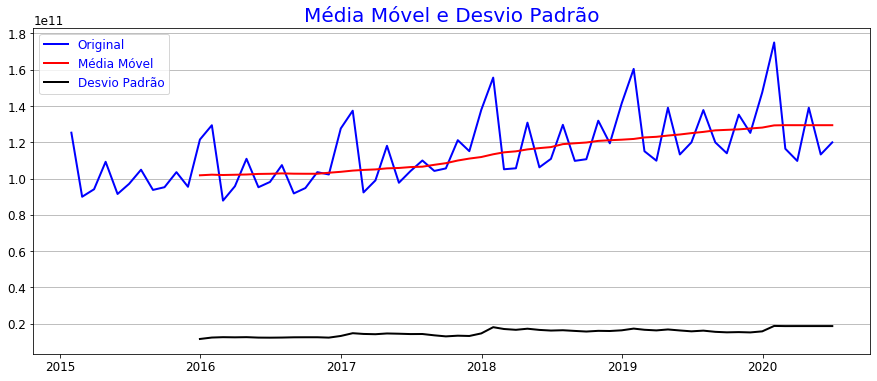

Results of Dickey-Fuller Test:
ADF Statistic: 0.6869694815887647
p-value: 0.9895742034772059
Critical Values:
	1%: -3.55770911573439
	5%: -2.9167703434435808
	10%: -2.59622219478738


In [14]:
#Aplicando o teste ADF na série 
get_stationarity(df)

### Reduzindo a Tendência

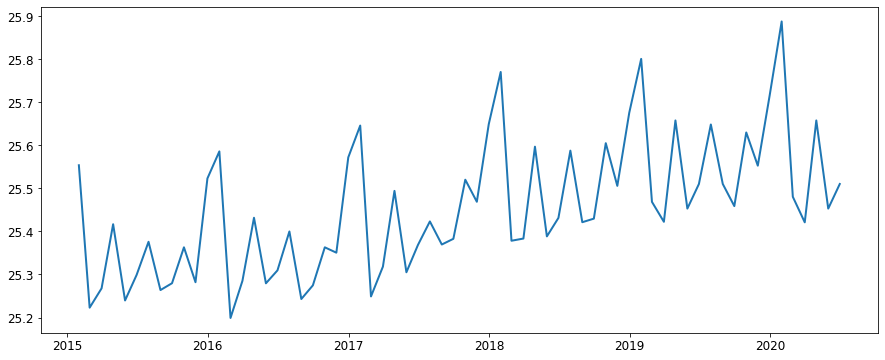

In [15]:
# Reduzindo a tendência de crescimento através da função logaritmica (Transformação)
df_log = np.log(df)
plt.plot(df_log)

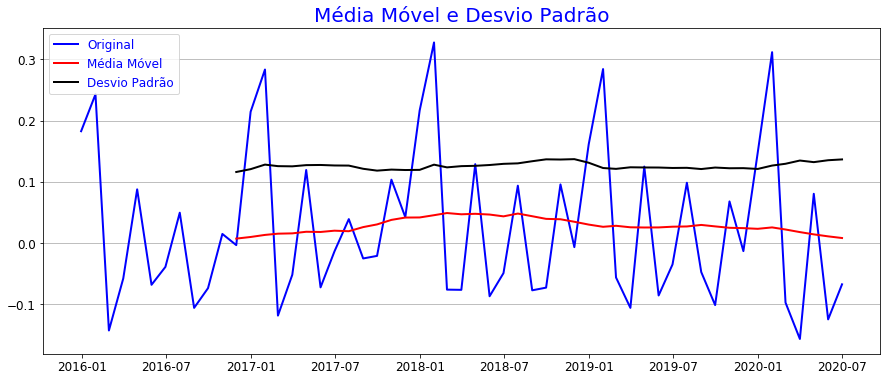

Results of Dickey-Fuller Test:
ADF Statistic: -0.9603479369194146
p-value: 0.7674504707740899
Critical Values:
	1%: -3.5925042342183704
	5%: -2.931549768951162
	10%: -2.60406594375338


In [16]:
#Transformando a série em estacionária com base na subtração da média móvel (Suavização)
med_mov = df_log.rolling(window=12).mean()
df_log_menos_med_mov = df_log - med_mov
df_log_menos_med_mov.dropna(inplace=True)
get_stationarity(df_log_menos_med_mov)

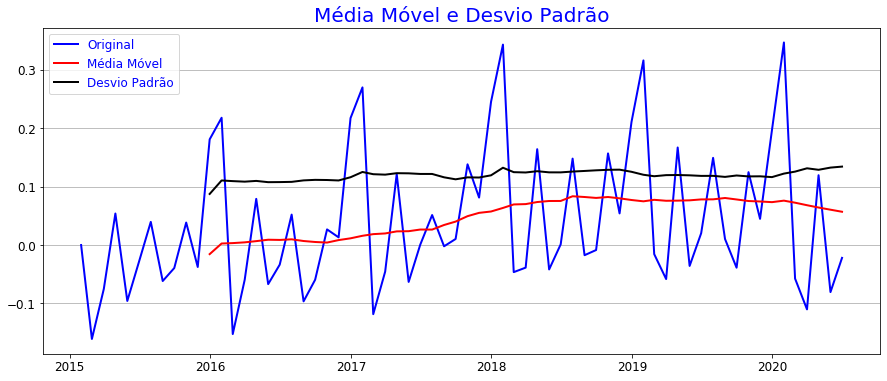

Results of Dickey-Fuller Test:
ADF Statistic: -2.2308800469539647
p-value: 0.19522924740938286
Critical Values:
	1%: -3.55770911573439
	5%: -2.9167703434435808
	10%: -2.59622219478738


In [17]:
#Transformando a série em estacionária com base na média ponderada exponencial (Suavização)

med_mov_exp = pd.DataFrame.ewm(df_log,halflife=12,adjust=True).mean()
df_log_menos_med_mov_exp = df_log - med_mov_exp
get_stationarity(df_log_menos_med_mov_exp)


### Eliminando Tendência e Sazonalidade

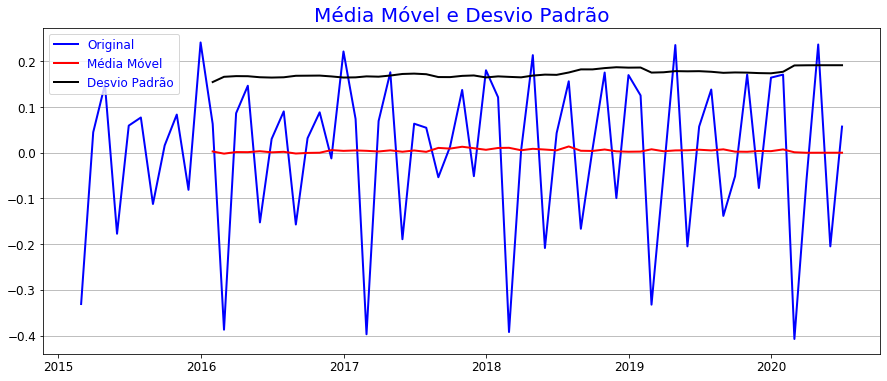

Results of Dickey-Fuller Test:
ADF Statistic: -3.27443411041908
p-value: 0.016060671652324214
Critical Values:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397


In [18]:
#Transformando a série em estacionária com base na subtração do valor seguinte (Diferenciação)
df_log_shift = df_log - df_log.shift(1)
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

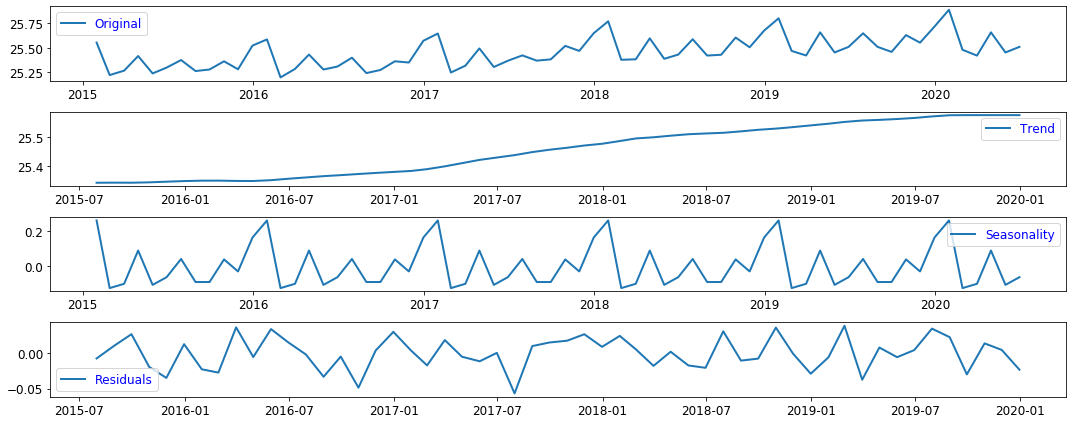

In [19]:
#Decomposição

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 
plt.subplot(411) 
plt.plot(df_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals')
plt.legend(loc='best') 
plt.tight_layout()

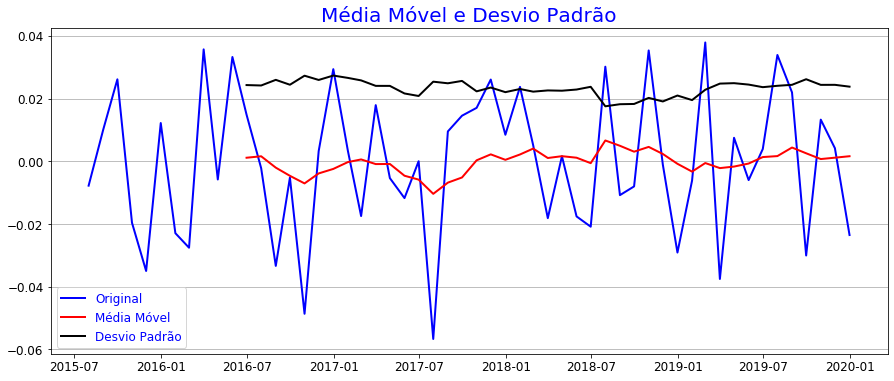

Results of Dickey-Fuller Test:
ADF Statistic: -4.903687993737573
p-value: 3.430246663673732e-05
Critical Values:
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064


In [20]:
#Análise dos resíduos
df_log_decompose = residual 
df_log_decompose.dropna(inplace=True) 
get_stationarity(df_log_decompose)

## Modelo ARIMA

In [21]:
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf

In [22]:
#ACF and PACF plots:
lag_acf = acf(df_log_shift, nlags=20, fft=False)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')

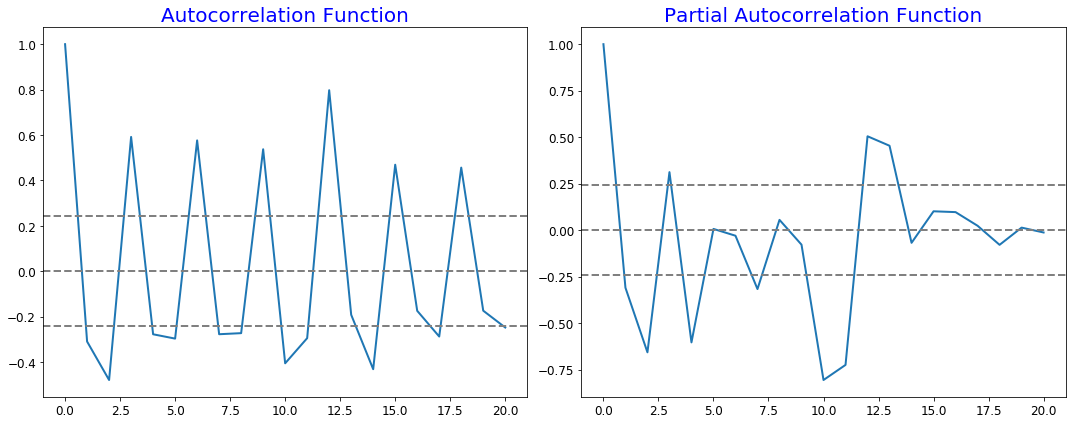

In [23]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF: 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

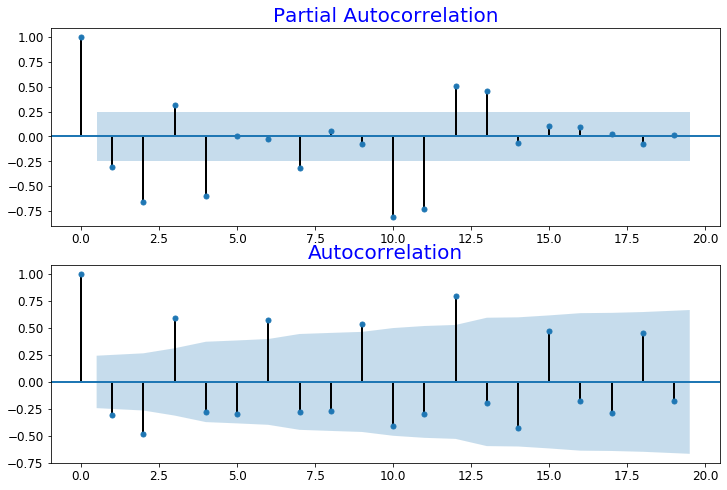

In [24]:
#Plotando Grafico de Autocorrelação e Autocorrelação Parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_pacf(df_log_shift, ax = ax1, method='ols') # identifica p = AR
plot_acf(df_log_shift, ax = ax2) # Identifica q = MA
plt.show()

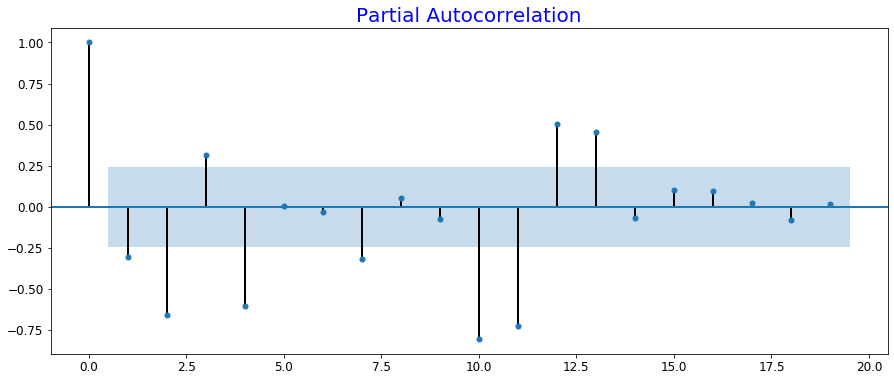

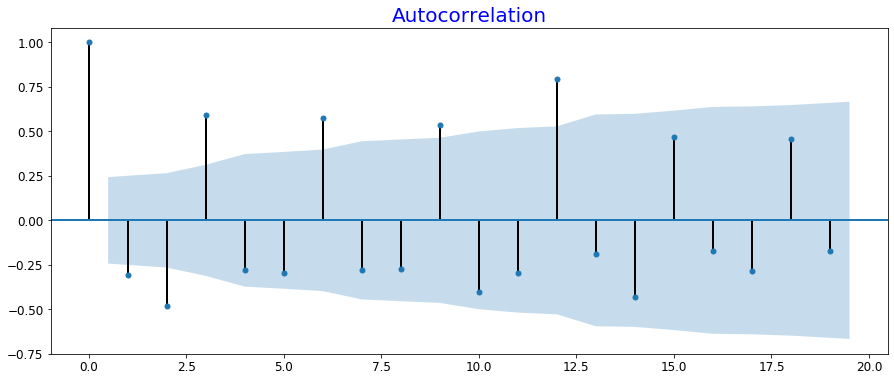

In [25]:
p=plot_pacf(df_log_shift, method='ols')

# Identifica q = MA
q=plot_acf(df_log_shift)

In [26]:
model_arima = ARIMA(df_log,order=(2,2,1), freq='M')
model_arima_fit = model_arima.fit()

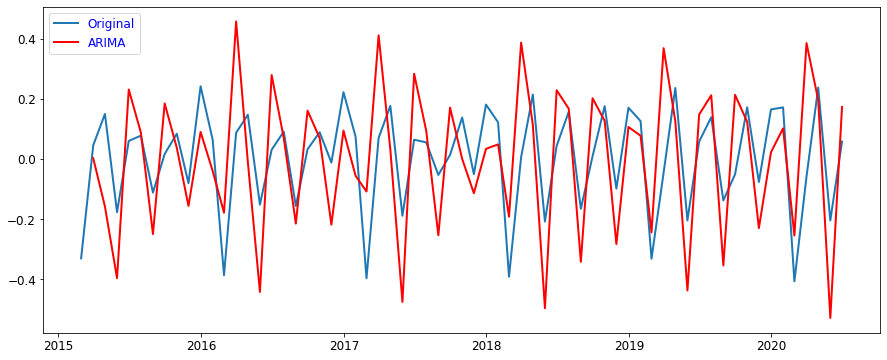

In [27]:
plt.plot(df_log_shift, label='Original')
plt.plot(model_arima_fit.fittedvalues, color='red', label='ARIMA')
plt.legend(loc='best')

Text(0.5, 1.0, 'Mean Absolute Percentage Error: 16.3198')

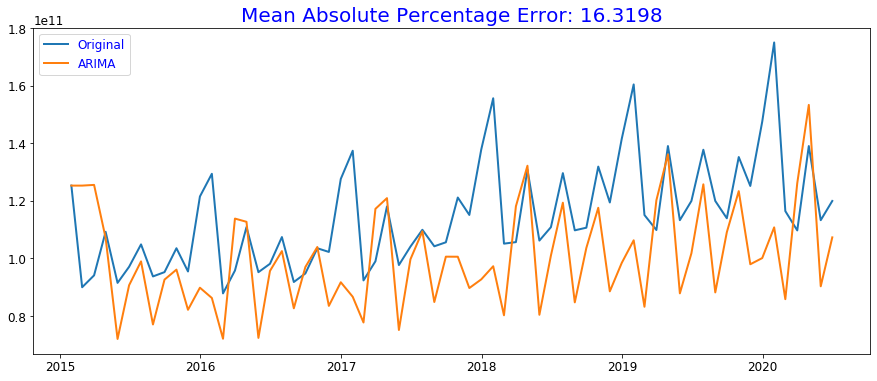

In [28]:
# Plotando os valores na escala original
pred_ARIMA_diff = pd.Series(model_arima_fit.fittedvalues, copy=True) 
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum() 
pred_ARIMA_log = pd.Series(df_log.iloc[0], index=df_log.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
pred_ARIMA = np.exp(pred_ARIMA_log)
plt.plot(df,label='Original')
plt.plot(pred_ARIMA,label='ARIMA') 
plt.legend(loc='best')
plt.title('Mean Absolute Percentage Error: %.4f'% mape(pred_ARIMA,df))